# Chandana L
Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


In [16]:

# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [17]:
%matplotlib inline
import seaborn as sns
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(10)


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [18]:
data.shape

(25, 2)

In [19]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


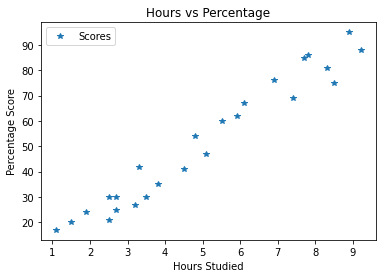

In [20]:
data.plot(x='Hours', y='Scores', style='*')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


In [9]:
#From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.
#Preparing the data

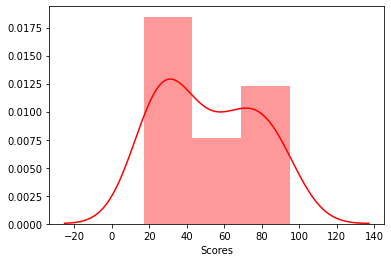

In [21]:
sns.distplot(data['Scores'],color='red')
plt.show()

In [8]:
X = data.iloc[:, :-1].values
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [22]:
y = data.iloc[:, 1].values
print(y)
print(y.shape)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]
(25,)


In [23]:
#Training the Algorithm¶
#We have split our data into training and testing sets, and now is finally the time to train our algorithm.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [24]:
print(regressor.intercept_)


2.018160041434683


[9.91065648]


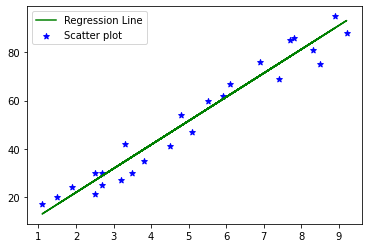

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [26]:
print(regressor.coef_)

line = regressor.coef_*X + regressor.intercept_
plt.scatter(X, y,label='Scatter plot',color='b',marker='*')
plt.plot(X, line,color='g', label='Regression Line')
plt.legend()
plt.show()

#Making Predictions
#Now that we have trained our algorithm, it's time to make some predictions.

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


In [13]:
print('Score of student who studied for 10.25 hours a day', regressor.predict([[10.25]]))

print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))
#Evaluating the model
#The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.


Score of student who studied for 10.25 hours a day [103.60238897]
Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


In [14]:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

hours = 9.25
y_test = np.array([hours])
y_test = y_test.reshape(-1, 1)

own_pred = regressor.predict(y_test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
No of Hours = 9.25
Predicted Score = 93.69173248737538
